#### 라이브러리 설치

In [1]:
import pandas as pd
import numpy as np

# 시각화
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import plot_tree

# 전처리
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# 알고리즘
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

# 검정
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, \
recall_score, f1_score, roc_auc_score

# 최적화
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.model_selection import GridSearchCV

### 데이터 불러오기

In [2]:
df = pd.read_csv('E:/FinancialDataMining/data/BankPersonalLoan.csv')

In [3]:
df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


#### ID와 ZIP Code 컬럼은 불필요한 변수라고 판단하여 제거

In [4]:
df = df.drop(['ID', 'ZIP Code'], axis = 1)

### 데이터의 기초 정보 확인 

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 5000 non-null   int64  
 1   Experience          5000 non-null   int64  
 2   Income              5000 non-null   int64  
 3   Family              5000 non-null   int64  
 4   CCAvg               5000 non-null   float64
 5   Education           5000 non-null   int64  
 6   Mortgage            5000 non-null   int64  
 7   Personal Loan       5000 non-null   int64  
 8   Securities Account  5000 non-null   int64  
 9   CD Account          5000 non-null   int64  
 10  Online              5000 non-null   int64  
 11  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(11)
memory usage: 468.9 KB


In [6]:
df.describe()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,45.338400,20.104600,73.774200,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,11.463166,11.467954,46.033729,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,23.000000,-3.000000,8.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,35.000000,10.000000,39.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,45.000000,20.000000,64.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,55.000000,30.000000,98.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,67.000000,43.000000,224.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


#### Experience 컬럼에 음수값 존재
- 음수값을 0으로 대체

In [7]:
df['Experience'].mask(df['Experience']<0, 0, inplace = True)

### 상관관계 확인

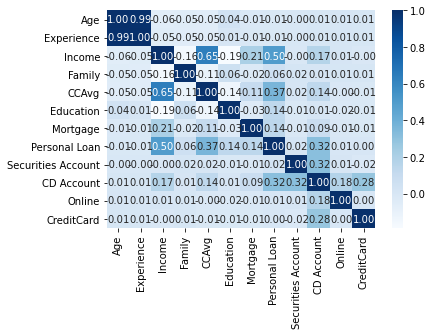

In [10]:
sns.heatmap(df.corr(), fmt = '.2f', cmap = 'Blues', annot = True);

#### Age와 Experience가 1에 가까운 상관계수를 가지는 것 확인
- Age 컬럼을 drop

In [11]:
df.drop('Age', axis = 1, inplace = True)

### train 데이터와 test 데이터 분리

In [12]:
X = df.drop('Personal Loan', axis = 1)
y = df['Personal Loan']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1, stratify = y)

### 정규화

In [13]:
ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

### pipeline 생성

In [14]:
pipe_lr = make_pipeline(LogisticRegression())

### 파라미터 설정

In [20]:
param_solver = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
param_penalty = ['l1', 'l2', 'elasticnet']
param_c = [0.01, 0.1, 1, 10, 100]

param_grid = [{'logisticregression__solver' : param_solver,
              'logisticregression__penalty' : param_penalty,
              'logisticregression__C' : param_c}]

lr_cv = GridSearchCV(estimator = pipe_lr,
                    param_grid = param_grid,
                    scoring = 'f1',
                    n_jobs = -1,
                    cv = 10)

lr_cv.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('logisticregression',
                                        LogisticRegression())]),
             n_jobs=-1,
             param_grid=[{'logisticregression__C': [0.01, 0.1, 1, 10, 100],
                          'logisticregression__penalty': ['l1', 'l2',
                                                          'elasticnet'],
                          'logisticregression__solver': ['newton-cg', 'lbfgs',
                                                         'liblinear', 'sag',
                                                         'saga']}],
             scoring='f1')

### 성과 확인

In [21]:
print(round(lr_cv.best_score_,3))
print(lr_cv.best_params_)

0.72
{'logisticregression__C': 10, 'logisticregression__penalty': 'l1', 'logisticregression__solver': 'saga'}
